In [20]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import cv2
import os   ##directories and file paths
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
##Import tensorflow dependencies
###siamese neural netwrok pass 2 images at the same time and similarity between 2 images p(output)=1/0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow  as tf

In [4]:
###Model(inputs=[inputimage, verificationimage], outputs=[1,0])
###class l1Dist(layer) (custom input layer)

In [5]:
##Avoid OUT OF MEMORY ERRORS
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    

In [6]:
##does anchor(webcam) match with positive(verifictaion), negative(not me), distinguish

In [7]:
##setup paths
POS_PATH=os.path.join('data','positive')##from webcam(opencv)
NEG_PATH=os.path.join('data','negative')###wrong download
ANC_PATH=os.path.join('data','anchor')##from webcam

POS_PATH

##create the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

In [ ]:
###anchor image vs positive images encoding.. then check dist---1 for max similarity
## https:www.cs.umass.edu%2Flfw%2F&v=UMjW4Db4E_g

import tarfile
import os

# Define the path to the .tgz file and the output directory
tgz_file_path = r"C:\Users\Shraddha\Downloads\Neural Network\lfw.tgz"
output_dir = r"C:\Users\Shraddha\Downloads\Neural Network"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Open the .tgz file and extract its contents directly to the output directory
with tarfile.open(tgz_file_path, "r:gz") as tar:
    # Get the list of members in the tar archive
    members = tar.getmembers()

    for member in members:
        # Construct the path to extract each member
        member_path = os.path.join(output_dir, member.name)
        # Ensure the directory exists
        member_dir = os.path.dirname(member_path)
        if not os.path.exists(member_dir):
            os.makedirs(member_dir)
        # Extract each file or directory
        tar.extract(member, output_dir)

print("Extraction successful!")


##move all folders to negative faces in the wild
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw',directory)):
        EX_PATH=os.path.join('lfw',directory, file)
        NEW_PATH=os.path.join(NEG_PATH,file)
        os.replace(EX_PATH,NEW_PATH)
    

In [54]:
import uuid

In [55]:
uuid??

Type:        module
String form: <module 'uuid' from 'C:\\Users\\Shraddha\\.anaconda\\anaconda-navigator\\Lib\\uuid.py'>
File:        c:\users\shraddha\.anaconda\anaconda-navigator\lib\uuid.py
Source:     
r"""UUID objects (universally unique identifiers) according to RFC 4122.

This module provides immutable UUID objects (class UUID) and the functions
uuid1(), uuid3(), uuid4(), uuid5() for generating version 1, 3, 4, and 5
UUIDs as specified in RFC 4122.

If all you want is a unique ID, you should probably call uuid1() or uuid4().
Note that uuid1() may compromise privacy since it creates a UUID containing
the computer's network address.  uuid4() creates a random UUID.

Typical usage:

    >>> import uuid

    # make a UUID based on the host ID and current time
    >>> uuid.uuid1()    # doctest: +SKIP
    UUID('a8098c1a-f86e-11da-bd1a-00112444be1e')

    # make a UUID using an MD5 hash of a namespace UUID and a name
    >>> uuid.uuid3(uuid.NAMESPACE_DNS, 'python.org')
    UUID('6fa459e

In [63]:
##collect positive and anchor classes, all pics in negative are 250*250
##capture webcam
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    frame=frame[150:150+250,250:250+250,:]
    cv2.imshow('Image collection', frame)
    if cv2.waitKey(1) & 0XFF ==ord('a'):
        imgname=os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)##uss file name pe save frame pics   
    if cv2.waitKey(1) & 0XFF ==ord('p'):
        imgnameP=os.path.join(POS_PATH,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgnameP, frame)##uss file name pe save frame pics 
        
    ##breaking gracefully
    if cv2.waitKey(1) & 0XFF ==ord('q'):
        break
#Release the webcam
cap.release()
#close the image show fraame
cv2.destroyAllWindows()



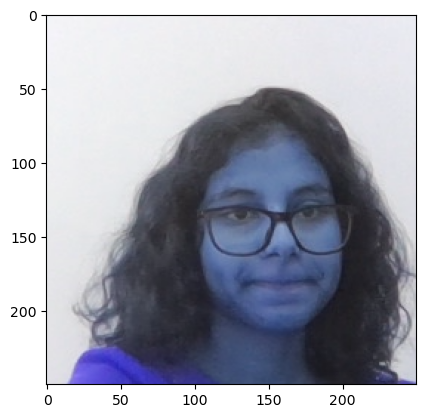

In [53]:
plt.imshow(frame)##not capturing face

In [64]:
'{}.jpg'.format(uuid.uuid1())

'3a6f4a30-4cb4-11ef-95ce-f889d2e6be64.jpg'

In [8]:
##load data from files
anchor=tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive=tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative=tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

dir_test=anchor.as_numpy_iterator()

dir_test.next()

In [9]:
###preproccess= load, resize and scale
def preprocess(file_path):
    ##read an image
    byte_img=tf.io.read_file(file_path)
    ## load in the image
    img=tf.io.decode_jpeg(byte_img)
    ##preproccessingg step resize to 100*100*3
    img=tf.image.resize(img,(100,100))
    ##scale the image to be between 0-1-better optimization in gradient descent
    img=img/255.0
    return img
    

In [10]:
img=preprocess('data\\anchor\\1125efff-4cb0-11ef-8e27-f889d2e6be64.jpg')

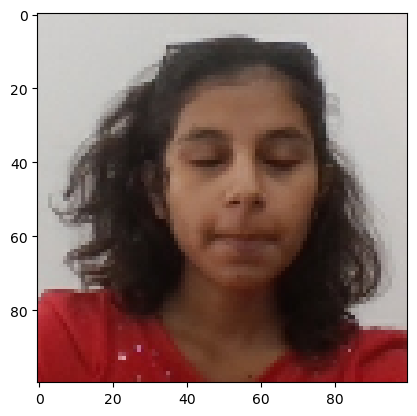

In [11]:
plt.imshow(img)

In [12]:
##create a labelled dataset
#(anchor, positive)=>1,1,1,1,1
#(anchor,neg)=>0,0,0,0
##add a someone else and you can do zip with 1 for them also
positives=tf.data.Dataset.zip((anchor,positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives=tf.data.Dataset.zip((anchor,negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data=positives.concatenate(negatives)

In [13]:
samples=data.as_numpy_iterator()
example=samples.next()

In [14]:
example

(b'data\\anchor\\e2f24afd-4caf-11ef-8657-f889d2e6be64.jpg',
 b'data\\positive\\6209f4c4-4cb0-11ef-9bd3-f889d2e6be64.jpg',
 1.0)

In [15]:
def preprocess_twin(input,valid,label):
    return(preprocess(input),preprocess(valid),label)

In [16]:
res=preprocess_twin(*example)

<class 'numpy.float32'>


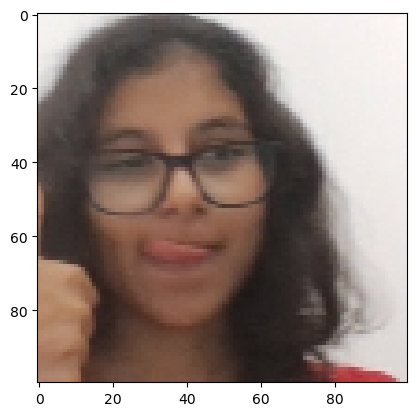

In [17]:
plt.imshow(res[0])
print(type(res[2]))

In [18]:
res[2]

1.0

In [19]:
## Build a Data pipeline
data=data.map(preprocess_twin)##essentially preproccess the data tuples
data=data.cache()
data=data.shuffle(buffer_size=1024)
##Dataset is ready=(anchor,positive,label)

In [20]:
# see you cant do data[1]
##since its a tensorflow data
samples=data.as_numpy_iterator()

In [21]:
samp=samples.next()

0.0


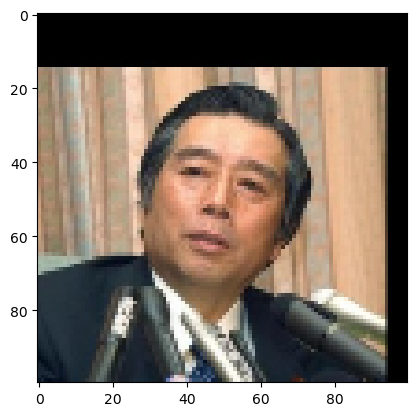

In [22]:
plt.imshow(samp[1])
print(samp[2])

In [23]:
###Training Testing Partition
train_data=data.take(round(len(data)*0.7))
train_data=train_data.batch(16)
train_data=train_data.prefetch(8)

In [24]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [25]:
train_samples=train_data.as_numpy_iterator()
sample_train=train_samples.next()

In [26]:
###16 columns, 3 rows each of anchor, positive/negative and label

In [27]:
test_data=data.skip(420)
test_data=test_data.take(round(len(data)*0.3))
test_data=test_data.batch(16)


In [28]:
###Model Engineering
def make_embedding():
    inp=Input(shape=(100,100,3))
    ##CNN-no.filters
    ##BLOCK-1
    c1=Conv2D(64,(10,10),activation='relu')(inp)
    m1=MaxPooling2D(64,(2,2),padding='same')(c1)
    ##BLOCK-2
    c2=Conv2D(128,(7,7),activation='relu')(m1)
    m2=MaxPooling2D(64,(2,2),padding='same')(c2)
    ##BLOCK-3
    c3=Conv2D(128,(4,4),activation='relu')(m2)
    m3=MaxPooling2D(64,(2,2),padding='same')(c3)
    ###BLOCK-4
    c4=Conv2D(256,(4,4),activation='relu')(m3)
    f1=Flatten()(c4)
    d1=Dense(4096, activation='sigmoid')(f1)
    
    
    
    
    return Model(inp, d1,name='embedding')

In [29]:
embedding=make_embedding()

In [30]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
###L1 Siamese layer-custom neural network
import math
from tensorflow.keras import layers, Model, Input
class L1Dist(layers.Layer):
    def __init__(self, **kwargs):
        super(L1Dist, self).__init__(**kwargs)
    
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)


l1=L1Dist
l1(anchor_embedding,validation_embedding)

In [32]:
input_image=Input(name='input_img',shape=(100,100,3))
validation_image=Input(name='validation_image',shape=(100,100,3))

In [33]:
inp_embedding=embedding(input_image)
val_embedding=embedding(validation_image)
siamese_layer=L1Dist()
l1_distance=siamese_layer(inp_embedding, val_embedding)

In [34]:
def make_siamese_model():
    #handle inputs
    input_image=Input(name='input_img',shape=(100,100,3))
    validation_image=Input(name='validation_img',shape=(100,100,3))
    ###combine siamese distance models
    siamese_layer=L1Dist()
    siamese_layer._name='distance'
    distances=siamese_layer(embedding(input_image),embedding(validation_image))
    ###classification layer
    classifier=Dense(1,activation='sigmoid')(distances)
    return Model(inputs=[input_image, validation_image],outputs=classifier,name='SiameseNetwork')

In [35]:
classifier=layers.Dense(1,activation='sigmoid')(l1_distance)
siamese_network=Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [36]:
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_image    │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_image… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist (L1Dist)    │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      4,097 │ l1_dist[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
siamese_model=make_siamese_model()


In [38]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_1 (L1Dist)  │ (None, 4096)      │          0 │ embedding[2][0],  │
│                     │                   │            │ embedding[3][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
binary_cross_loss=tf.losses.BinaryCrossentropy()

In [40]:
opt=tf.keras.optimizers.Adam(1e-4)

In [41]:
###establish checkpoint
checkpoint_dir='./training.checkpoints'
checkpoint_prefix=os.path.join(checkpoint_dir,'chkpt')
checkpoint=tf.train.Checkpoint(opt=opt,siamese_model=siamese_model)


In [42]:
@tf.function
def train_step(batch):
    with tf.GradientTape() as tape:
        x=batch[:2]
        y=batch[2]
        yhat=siamese_model(x,training=True)
        ##calculate loss
        loss=binary_cross_loss(y,yhat)
        ##calculate gradients
        grad=tape.gradient(loss,siamese_model.trainable_variables)
        opt.apply_gradients(zip(grad,siamese_model.trainable_variables))
        return loss

In [43]:
def train(data, EPOCHS):
    for epoch in range(1,EPOCHS+1):
        print('\n epoch{}?{}'.format(epoch,EPOCHS))
        progbar=tf.keras.utils.Progbar(len(data))
        for idx,batch in enumerate(data):
            train_step(batch)
            progbar.update(idx+1)

        if epoch%10==0:
            checkpoint.save(file_prefic=checkpoint_prefix)
        
    

In [44]:
EPOCH=5
train(train_data,EPOCH)


 epoch1?5
27/27 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step

 epoch2?5
27/27 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step

 epoch3?5
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step

 epoch4?5
27/27 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step

 epoch5?5
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step


In [46]:
from tensorflow.keras.metrics import Precision, Recall
test_input,test_val,y_true=test_data.as_numpy_iterator().next()##in batches of 16

In [47]:
predictions=siamese_model.predict([test_input,test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [48]:
[1 if y>0.5 else 0 for y in predictions]

[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]

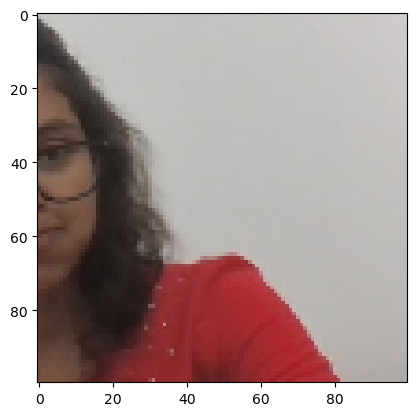

In [49]:

    plt.imshow(test_input[5])


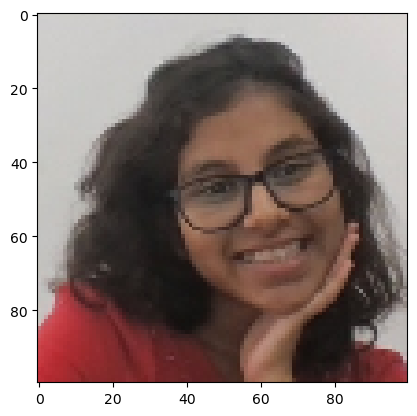

In [50]:

   
    plt.imshow(test_val[5])

In [51]:
y_true

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
      dtype=float32)

In [52]:
m=Recall() ##and precision is 100%
m.update_state(y_true,predictions)
m.result().numpy()

1.0

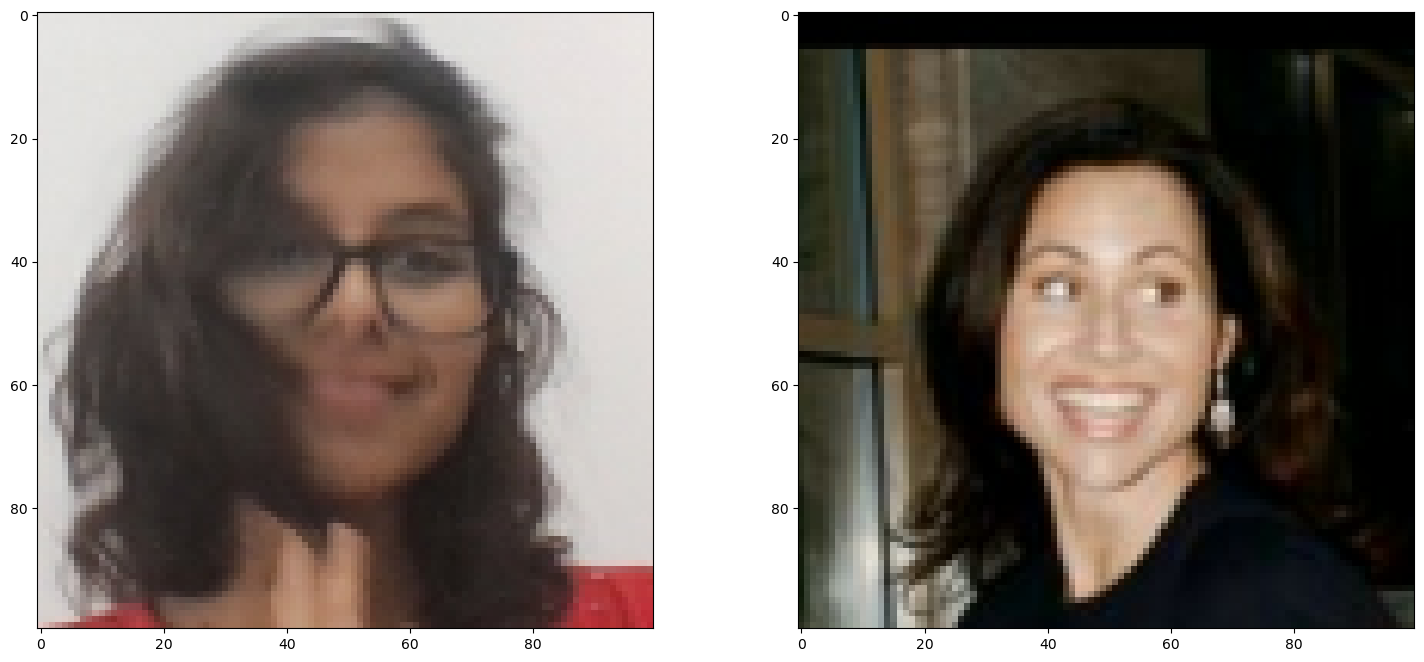

0.0


In [53]:
#####visualize results
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.imshow(test_input[11])
plt.subplot(1,2,2)
plt.imshow(test_val[11])
plt.show()
print(y_true[11])

In [54]:
siamese_model.save('siamesemodel.h5')


In [55]:
model=tf.keras.models.load_model('siamesemodel.h5',custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})


In [56]:
model.predict([test_input,test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


array([[2.9123048e-06],
       [9.9684483e-01],
       [6.7754820e-07],
       [3.3786713e-05],
       [9.8461884e-01],
       [9.9603349e-01],
       [1.9803010e-03],
       [1.4183538e-04],
       [5.2726814e-03],
       [6.7423189e-01],
       [6.1270222e-03],
       [1.3310675e-07],
       [5.5139327e-01],
       [8.1776865e-02],
       [9.7137266e-01],
       [6.0792034e-04]], dtype=float32)

In [57]:
model.summary()##created a custom model

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_1 (L1Dist)  │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
####Real Time Test

In [71]:
#opencv real time verification-function
def verify(model, detection_threshold,verification_threshold):
    results=[]
    for image in os.listdir(os.path.join('application_data','verification_image')):
        input_img=preprocess(os.path.join('application_data','input_image','input_image.jpg'))
        validation_img=preprocess(os.path.join('application_data','verification_image',image))
        result=model.predict(list(np.expand_dims([input_img, validation_img],axis=1)))
        results.append(result)
    detection=np.sum(np.array(results)>detection_threshold)
    verification=detection/75
    verified=verification>verification_threshold
    return results, verified
        


In [84]:
##OpenCV real time verification
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    frame=frame[150:150+250,250:250+250,:]
    cv2.imshow('verification',frame)
    ##verificatio trigger
    if cv2.waitKey(1) & 0xFF==ord('v'):
        cv2.imwrite(os.path.join('application_data','input_image','input_image.jpg'),frame)
        ##run verification
        results, verified=verify(model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows
    
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━

<function destroyAllWindows>

In [85]:
np.squeeze(results)>0.5

array([ True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False,  True,
        True,  True,  True])

In [86]:
!pip install kivy[full] kivy_examples

   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.1 MB 2.6 MB/s eta 0:00:04
   ---------------------------------------- 0.1/10.1 MB 2.6 MB/s eta 0:00:04
   ---------------------------------------- 0.1/10.1 MB 2.6 MB/s eta 0:00:04
   ---------------------------------------- 0.1/10.1 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.3/10.1 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.1 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.1 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.1 MB 1.6 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/10.1 MB 1.9 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/10.1 MB 2.3 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/10.1 MB 3.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/10.1 MB 3.9 MB/s eta 0:00:03
   ---